# Make plots

In [1]:
%load_ext autoreload
%autoreload 2

# Import required modules

In [2]:
import numpy as np, os, sys, glob
from pylab import *
import tools

In [3]:
rcParams['figure.dpi'] = 150
rcParams['figure.facecolor'] = 'white'

# Plot 2 - Reconstructed $\hat{K}(\mathbf{\hat{n}})$ maps.
## <u>Note</u>: The right (data) panel has been set to NaNs and will be shared when the SPT-3G maps become publicly available.

dict_keys(['mean_field', 'data', 'sims', 'mask', 'gauss_beam_fwhm_deg_for_smoothing', 'bl_1d_smoothing', 'bl_2D_smoothing', 'boxsize_deg', 'ra0', 'dec0', 'Fbar'])


<Figure size 900x600 with 0 Axes>

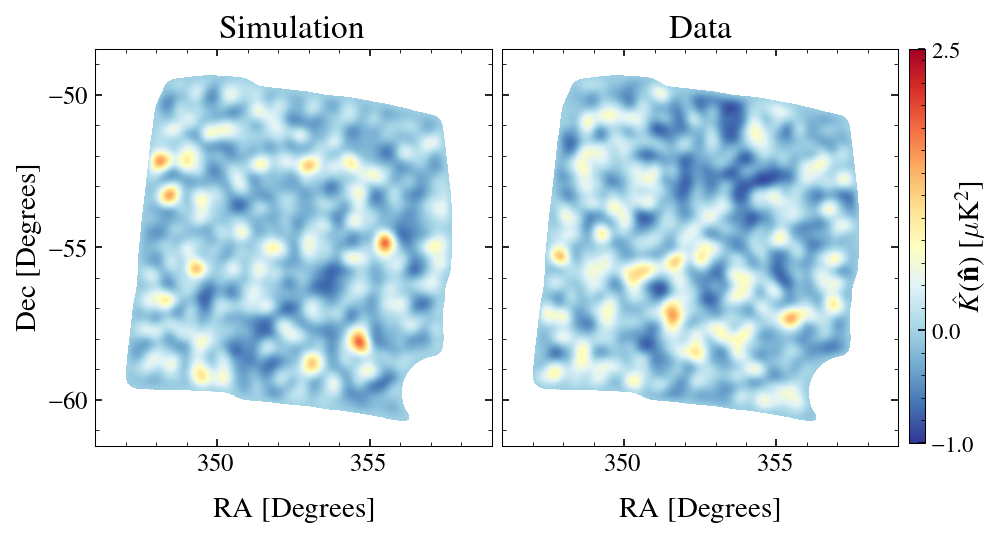

In [5]:
fname = 'results_private/K_map_data_sims_meanfield.npy'
if (0):##not os.path.exists(fname):
    fname = 'results/K_map_data_sims_meanfield.npy'

#read file
res_dict = np.load(fname, allow_pickle=True).item()
print(res_dict.keys())

#mean_field = res_dict['mean_field'] #already removed
kmap_data = res_dict['data']
kmap_sims = res_dict['sims']
##imshow(kmap_data); colorbar(); show()
##imshow(kmap_sims); colorbar(); show(); sys.exit()
kmap_mask = res_dict['mask']
gauss_beam_fwhm_deg = res_dict['gauss_beam_fwhm_deg_for_smoothing']
bl_for_smoothing = res_dict['bl_1d_smoothing']
bl_2D_for_smoothing = res_dict['bl_2D_smoothing']
boxsize_deg = res_dict['boxsize_deg']
Fbar = res_dict['Fbar']
ra0, dec0 = res_dict['ra0'], res_dict['dec0']

remove_filter = False

clf()
vmin, vmax = -1., 2.5
##vmin, vmax = -1., 3.
if remove_filter:
    vmin, vmax = -8., 12.

cmap = cm.RdYlBu_r
fsval = 14
fig = figure(figsize=(7., 3.5))
to_plot_keyname_arr = ['sims', 'data']
tr, tc = 1, 2
subplots_adjust(hspace = 0.0, wspace = 0.0)
xmin, xmax = ra0 - boxsize_deg/2., ra0 + boxsize_deg/2.
ymin, ymax = dec0 - boxsize_deg/2., dec0 + boxsize_deg/2.

to_plot_keyname_dict = {'data': [kmap_data, r'Data'], 'sims': [kmap_sims, r'Simulation']}
for to_plot_cntr, to_plot_keyname in enumerate( sorted(to_plot_keyname_dict, reverse=True) ):
    curr_bigk_map, curr_titleval = to_plot_keyname_dict[to_plot_keyname]    
    if remove_filter: curr_bigk_map = curr_bigk_map / Fbar

    #perform smoothing
    curr_bigk_map = np.fft.ifft2( np.fft.fft2(curr_bigk_map) * bl_2D_for_smoothing ).real
    curr_bigk_map = curr_bigk_map * kmap_mask
    masked_inds = np.where( kmap_mask <=0.4)
    curr_bigk_map[masked_inds] = None
    
    ax = subplot(tr, tc, to_plot_cntr+1)
    tmp_imshow = imshow(curr_bigk_map, extent = [xmin, xmax, ymin, ymax], cmap = cmap, vmin = vmin, vmax = vmax);    
    title(r'%s' %(curr_titleval), fontsize = fsval+2)

    ax = tools.format_axis(ax,fsval-2,fsval-2,maxxloc=3, maxyloc=3)
    xlabel(r'RA [Degrees]', fontsize = fsval, labelpad = 10.)
    if to_plot_cntr == 0:
        ylabel(r'Dec [Degrees]', fontsize = fsval)
    else:
        setp(ax.get_yticklabels(), visible=False)
    
#include colour bar
xloc, yloc = 0.905, 0.13 #0.05
w, h = 0.015, 0.75 #0.745
orientation_val = 'vertical'
labelpad = -10

cax = fig.add_axes([xloc, yloc, w, h])
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cbar = mpl.colorbar.ColorbarBase(cax, norm = norm, ticks = [vmin, 0., vmax], cmap=cmap, orientation=orientation_val)#, format = r'\textbf{$%g$}')#, drawedges = 0.)
##cbar_labval = r'$\hat{K}\ $[$\mu$K$^{2}$]'
cbar_labval = r'$\hat{K}(\mathbf{\hat{n}})\ $[$\mu$K$^{2}$]'
if remove_filter:
    cbar_labval = r'$F^{-1}$ %s' %(cbar_labval)
cbar.set_label(cbar_labval, fontsize = fsval, labelpad = labelpad)
cbar.ax.tick_params(labelsize=fsval-3)#, pad = -3)
#cbar.ax.tick_params(which = 'minor', right = 'off')

plname = 'plots/bigk_maps_data_vs_sims.pdf'
##savefig(plname, dpi = 200.)
show()
                                      

# Plot 3 - Trispectra $\hat{C}_{L}^{KK}$.

dict_keys(['covariance', 'L', 'N0', 'sims', 'sims_individual', 'data', 'sims_tsz0p8', 'sims_tsz0p8_individual', 'sims_tsz1p2', 'sims_tsz1p2_individual', 'sims_cib1p2', 'sims_cib1p2_individual', 'amber_fid_z_mid', 'amber_fid_delta_z_90', 'amber_ksz', 'final_fsky'])
1.1320696337787786 0.8212161645483774


<Figure size 900x600 with 0 Axes>

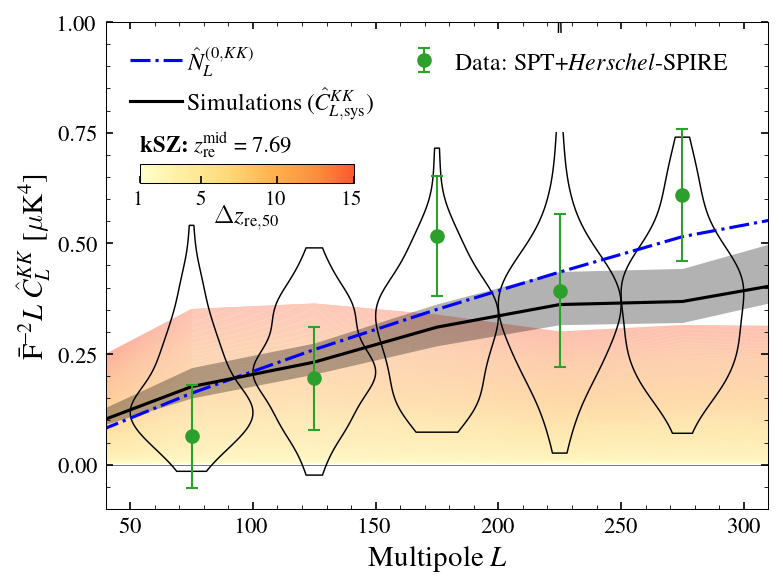

In [29]:
reqd_lmin_lmax = (3300.0, 4300.0) #\ell_min, \ell_max
#fname = 'results/20240220_before_realisingnongaucovincludesgaussiancovaswell/CL_kk_data_sims_amberksz_nzero.npy'
fname = 'results/CL_kk_data_sims_amberksz_nzero.npy'

#read file
res_dict = np.load(fname, allow_pickle=True).item()[reqd_lmin_lmax]
print(res_dict.keys())

#fsky lost due to source masking/inpainting
#fsky_lost_due_to_source_masking = res_dict['fsky_lost_due_to_source_masking'] #already factored out.

#get values for plotting
L = res_dict['L'] #L bins
cl_kk_cov = res_dict['covariance'] #covariance
cl_kk_err = np.diag(cl_kk_cov)**0.5 #error
cl_kk_N0 = res_dict['N0']
cl_kk_sims_ind_arr = res_dict['sims_individual'] #100 simulations
cl_kk_sims_mean = res_dict['sims'] #sim mean
cl_kk_sims_tsz0p8_mean = res_dict['sims_tsz0p8'] #sims with tSZx0.8 mean
cl_kk_sims_tsz1p2_mean = res_dict['sims_tsz1p2'] #sims with tSZx1.2 mean
if (1):
    ratio_fid_tsz0p8 = np.mean(cl_kk_sims_mean/cl_kk_sims_tsz0p8_mean)
    ratio_fid_tsz1p2 = np.mean(cl_kk_sims_mean/cl_kk_sims_tsz1p2_mean)
    print( ratio_fid_tsz0p8, ratio_fid_tsz1p2 )
cl_kk_sims_mean = res_dict['sims'] #sim mean
cl_kk_data = res_dict['data'] #data
#AMBER
cl_kk_amber_ksz_baseline = res_dict['amber_ksz'] #AMBER-kSZ
amber_fid_z_mid = res_dict['amber_fid_z_mid'] #AMBER fiducial z_min
amber_fid_delta_z_90 = res_dict['amber_fid_delta_z_90'] #AMBER fiducial delta_z_90


clf()
lwval = 1.5
fsval = 14
figure(figsize = (5.7, 4.3))
ax = subplot(111)
dlfac = L
nzerocolor = 'blue'
simcolor = 'black'
datacolor = 'tab:green'

#AMBER-kSZ
maxz = 15.
reqd_delta_z_50_arr = np.arange(1., maxz+.05, 0.05)
reqd_z_re_val = 7.69 #Planck zmid
##amber_colormap = cm.YlGn
amber_colormap = cm.YlOrRd
amber_colormap = tools.truncate_colormap(amber_colormap)
tmpcolorarr = [amber_colormap(int(d)) for d in np.linspace(0, 255, len(reqd_delta_z_50_arr))]
delta_z_50_color_dict = {}
for zzzcntr, zzz in enumerate( reqd_delta_z_50_arr ):
    delta_z_50_color_dict[zzz] = tmpcolorarr[zzzcntr]
amber_ksz_clkk_arr = tools.parent_get_amber_ksz_4pt_using_scaling(reqd_delta_z_50_arr, [reqd_z_re_val], cl_kk_amber_ksz_baseline)
for tmpcntr, reqd_delta_z_50_val in enumerate(reqd_delta_z_50_arr):
    plot(L, dlfac * amber_ksz_clkk_arr[tmpcntr], color = delta_z_50_color_dict[reqd_delta_z_50_val], lw = 0.3, ls = '-', zorder = -100, alpha = 0.5)


'''
#individual sims
for cl_kk_sims_ind in cl_kk_sims_ind_arr:
    plot(L, dlfac * cl_kk_sims_ind, color = simcolor, lw = 0.3, alpha = 0.15)
'''    

#vioilin
for Lcntr, curr_L in enumerate(L):
    if curr_L<50 or curr_L>300: continue
    cl_kk_sims_curr_Lbin = cl_kk_sims_ind_arr[:, Lcntr]
    ##violinplot([dlfac[Lcntr] * cl_kk_sims_curr_Lbin], [curr_L], widths = 50., showextrema = True, showmeans=False, quantiles = [0.16, 0.84], points = 100)
    violins = violinplot([dlfac[Lcntr] * cl_kk_sims_curr_Lbin], [curr_L], widths = 50., showextrema = False, showmeans=False, points = 100)
    for pc in violins['bodies']:        
        pc.set_facecolor('None'); pc.set_edgecolor('black'); pc.set_alpha(1.); pc.set_linestyle('-'); pc.set_linewidth(0.7)
        

    '''
    errorbar(L, dlfac * cl_kk_sims_mean, yerr = dlfac * cl_kk_err, ls = 'None', marker = 'o', ms = 6., color = 'black', elinewidth = 1., capsize = 2., capthick = 1., zorder = 1000)    
    cl_kk_err_v2 = np.std( cl_kk_sims_ind_arr, axis = 0)
    errorbar(L-5., dlfac * cl_kk_sims_mean, yerr = dlfac * cl_kk_err_v2, ls = 'None', marker = 'o', ms = 6., color = 'red', elinewidth = 1., capsize = 2., capthick = 1., zorder = 1000)
    '''

#N0
plot(L, dlfac * cl_kk_N0, color = nzerocolor, ls = '-.', lw = lwval)#, label = r'$N^{(0, KK)}$')

#sims mean
###plot(L, dlfac * cl_kk_sims_tsz0p8_mean, lw = lwval, color = simcolor)
##plot(L, dlfac * cl_kk_sims_tsz1p2_mean, lw = lwval, color = simcolor)
fill_between(L, dlfac * cl_kk_sims_tsz0p8_mean, dlfac * cl_kk_sims_tsz1p2_mean, edgecolor = 'None', lw = 0., color = 'black', alpha = 0.3)
plot(L, dlfac * cl_kk_sims_mean, lw = lwval, color = simcolor)

#data
errorbar(L, dlfac * cl_kk_data, yerr = dlfac * cl_kk_err, ls = 'None', marker = 'o', ms = 6., color = datacolor, mew = 1., elinewidth = 1., capsize = 3., capthick = 1., zorder = 1000)


axhline(lw = 0.25, color = 'black')
ax = tools.format_axis(ax, fsval-3, fsval-3)
xlabel(r'Multipole $L$', fontsize = fsval)
ylabel(r'${\rm \bar{F}^{-2}} L\ \hat{C}_{L}^{KK}$ [$\mu$K$^{4}$]', fontsize = fsval)

#ymin, ymax = -0.1, 0.95
ymin, ymax = -0.1, 1.
xlim(40., 310.); ylim(ymin, ymax) #ylim(-0.05, 0.4)

ax.yaxis.set_major_locator(plt.MaxNLocator(5))

############################################################
#write legends
'''
fig = plt.gcf()
xloc, yloc = 0.225, 0.795
w, h = 0.2, 0.1
cax = fig.add_axes([xloc, yloc, w, h])
'''
plot([], [], color = nzerocolor, label = r'$\hat{N}_{L}^{(0, KK)}$', lw = lwval, ls = '-.')
plot([], [], color = simcolor, lw = lwval, ls = '-', label = r'Simulations ($\hat{C}_{L,{\rm sys}}^{KK}$)')
errorbar([0.], [0.], yerr = [0.], ls = 'None', label = r'Data: SPT+{\it Herschel}-SPIRE', lw = lwval, marker = 'o', ms = 6., color = datacolor, mew = 1., elinewidth = 1., capsize = 3., capthick = 1., zorder = 1000)
leg = legend(loc = 2, fontsize = fsval-2.5, ncol = 2, handlelength = 2.2, columnspacing=1., framealpha=1., labelspacing = 0.5, handletextpad = 0.2, numpoints = 1)
leg.get_frame().set_color('white')
#axis('off')
if (1): #kSZ colour map
    fig = plt.gcf()
    amber_tickvals = [1., 5., 10., maxz]
    #xloc, yloc = 0.165, yloc - 0.19
    ###xloc, yloc = 0.165, 0.56
    ##xloc, yloc = 0.165, 0.69
    xloc, yloc = 0.165, 0.63
    cax = fig.add_axes([xloc, yloc, 0.25, 0.03], frame_on = True, alpha = 1.)
    figtext(xloc, yloc+.05, r'{\bf kSZ:} $z_{\rm re}^{\rm mid} = %g$' %(reqd_z_re_val), fontsize = fsval-3)
    vmin, vmax = 1., max(reqd_delta_z_50_arr)
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cb = mpl.colorbar.ColorbarBase(cax, cmap=amber_colormap, norm=norm, orientation='horizontal', ticks = amber_tickvals, drawedges = 0., format = r'%g')
    cb.set_label(r'$\Delta {z_{\rm re, 50}}$', fontsize=fsval-2, labelpad = -2.)#-17., position = (0.6,0.38), horizontalalignment='right')
    cb.ax.tick_params(labelsize=fsval-4)
    cb.minorticks_off()
############################################################

plname = 'plots/clkk_data_sims_amber.pdf'
savefig(plname, dpi=200.)

show()



# Plot 3 - Posteriors for $\Delta z_{\rm re, 50}$ and $z^{\rm mid}_{\rm re}$.

# Plot N - Appendix: Likelihood $\mathcal{L}$ plots for reionisation duration $\Delta_{z}$ w/ and w/o foreground temeplate systematic.

dict_keys([0, 1])
Fit for foregrounds = False
	Parameters present for this case = ['delta_z']
Fit for foregrounds = True
	Parameters present for this case = ['delta_z', 'ampcmbfg']
Fit for foregrounds = False
	Parameters present for this case = ['delta_z']
Fit for foregrounds = True
	Parameters present for this case = ['delta_z', 'ampcmbfg']


<Figure size 900x600 with 0 Axes>

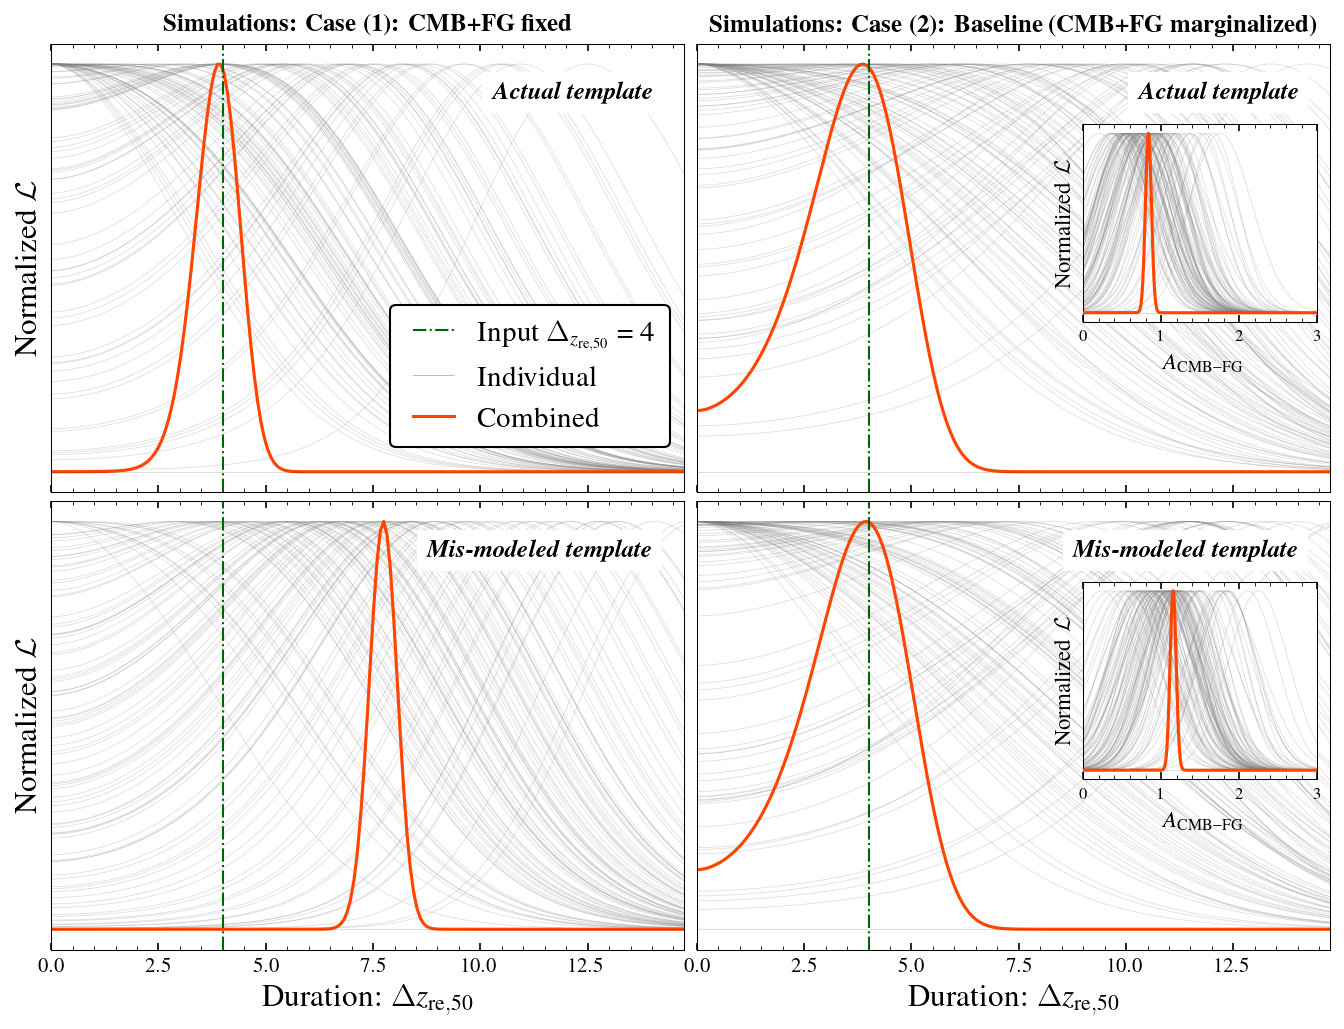

In [7]:
fname = 'results/sims_data_for_likelihood_with_and_without_systematic_for_plotting.npy'

#read file
res_dict = np.load(fname, allow_pickle=True).item()

#keys correpond to Case (A) - A_{CMB+FG} fixed and Case (B) - A_{CMB+FG} marginalised.
fit_for_fg_arr = res_dict.keys()
print(fit_for_fg_arr) 

comp_all_arr = ['cib_cmb_rad_tsz_ksz_noise', 'cib_cmb_rad_tszx1.2_ksz_noise']

ip_delta_z_50_val_for_sims = 4. #for simulations
ind_sim_alphaval = 0.25 #0.5
ind_sim_lwval = 0.4
sim_lwval, sim_lsval = 1.5, '-'
data_lwval, data_lsval = 1.5, '-'
input_lwval, input_lsval = 1., '-.'
arrow_lwval = 2.
sim_color, ind_sim_color = 'orangered', 'gray'

clf()
figure(figsize = (11., 8.))
subplots_adjust(hspace = 0.02, wspace = 0.02)
tr, tc = 2, 2
sbpl = 1
to_store_dic = {}
for comp_all_cntr, comp_all in enumerate( comp_all_arr ):
    if comp_all == 'cib_cmb_rad_tsz_ksz_noise':
        which_estimate_to_remove_for_sims = 'fiducial'
        which_estimate_to_remove_for_sims_str = r'Actual template'
    elif comp_all == 'cib_cmb_rad_tszx1.2_ksz_noise':
        which_estimate_to_remove_for_sims = 'not_same'
        which_estimate_to_remove_for_sims_str = r'Mis-modeled template'

    for fit_for_fg in fit_for_fg_arr:
        if fit_for_fg == 0:
            tit_str = r'Case (1): CMB+FG fixed'
        else:
            tit_str = r'Case (2): Baseline (CMB+FG marginalized)'

        param_arr_to_plot = list(res_dict[fit_for_fg][comp_all][which_estimate_to_remove_for_sims].keys())
        print('Fit for foregrounds = %s' %(bool(fit_for_fg)))
        print('\tParameters present for this case = %s' %(str(param_arr_to_plot)))

        #first plot delta_z
        param_to_plot = 'delta_z'
        xarr, individual_sim_Larr, combined_sim_Larr, best_fit_sim_arr, data_Larr = res_dict[fit_for_fg][comp_all][which_estimate_to_remove_for_sims][param_to_plot]

        ax = subplot(tr, tc, sbpl)
        fsval = 11
        if sbpl <= 2:
            title(r'{\bf Simulations: %s}' %(tit_str), fontsize = 12)
        title(r'{\bf \emph{%s}}' %(which_estimate_to_remove_for_sims_str), fontsize = 12, y = 0.85, x = 0.95, backgroundcolor = 'white', loc = 'right')#, color = 'hotpink')

        #individual sims
        for ind_sim_cntr, ind_sim_L in enumerate( individual_sim_Larr ):
            plot(xarr, ind_sim_L, color = ind_sim_color, alpha = ind_sim_alphaval, lw = ind_sim_lwval, zorder = -100)
            
        #combined sims
        plot(xarr, combined_sim_Larr, color = sim_color, lw = sim_lwval, ls = sim_lsval)
        axvline(ip_delta_z_50_val_for_sims, ls = input_lsval, color = 'darkgreen', lw = input_lwval)

        if fit_for_fg == 0 and sbpl == 1: #write legend
            plot([] , [], color = 'darkgreen', lw = 1., ls = '-.', label = r'Input $\Delta_{z_{\rm re, 50}}$ = %g' %(ip_delta_z_50_val_for_sims))
            plot([] , [], color = ind_sim_color, lw = 0.5, alpha = 0.5, label = r'Individual')
            plot([] , [], color = sim_color, lw = sim_lwval, label = r'Combined' )
            #legend(loc=4, fontsize = fsval+3, framealpha = 1.)
            legend(bbox_to_anchor=(1., 0.45), fontsize = fsval+3, framealpha = 1., handletextpad = 0.5)

        xlabval = r'Duration: %s' %(tools.get_latex_param_str(param_to_plot))

        if sbpl <= 2:
            setp(ax.get_xticklabels(which = 'both'), visible=False)
        else:
            xlabel(xlabval, fontsize = fsval+4)#, labelpad = labelpad)#, backgroundcolor = 'white')
        if sbpl == 1 or sbpl == 3:
            ylabel(r'Normalized $\mathcal{L}$', fontsize = fsval+4)#, backgroundcolor = 'white')
        setp(ax.get_yticklabels(which = 'both'), visible=False)
        ax.tick_params(axis='y', which='both', length=0)

        xmin, xmax = 0., 14.75
        xlim(xmin, xmax)
        ylim(-0.05, 1.05)
        axhline(lw = 0.25, alpha = 0.25)
        ax.xaxis.set_major_locator(plt.MaxNLocator(6))

        #inset plot for A_{CMB+FG}
        if fit_for_fg:
            fsval = 10
            rect=[0.61,0.38,0.37,0.44]
            ax2=tools.add_subplot_axes(ax,rect)
            ax2.set_facecolor('white')

            param_to_plot = 'ampcmbfg'
            xarr, individual_sim_Larr, combined_sim_Larr, best_fit_sim_arr, data_Larr = res_dict[fit_for_fg][comp_all][which_estimate_to_remove_for_sims][param_to_plot]

            #individual sims
            for ind_sim_L in individual_sim_Larr:
                plot(xarr, ind_sim_L, color = ind_sim_color, alpha = ind_sim_alphaval, lw = ind_sim_lwval, zorder = -100)
                
            #combined sims
            plot(xarr, combined_sim_Larr, color = sim_color, zorder = 100, lw = sim_lwval, ls = sim_lsval)

            xlabval = r'%s' %(tools.get_latex_param_str(param_to_plot))
            xlabel(xlabval, fontsize = fsval+1)#, labelpad = labelpad)#, backgroundcolor = 'white')
            ylabel(r'Normalized $\mathcal{L}$', fontsize = fsval+1)#, backgroundcolor = 'white')
            setp(ax2.get_yticklabels(which = 'both'), visible=False)
            ax2.tick_params(axis='y', which='both', length=0)

            xmin, xmax = 0., 3.
            xlim(xmin, xmax)
            ylim(-0.05, 1.05)
            axhline(lw = 0.25, alpha = 0.25)
            ax2=tools.format_axis(ax2, fsval-2, fsval-2)
            ax2.xaxis.set_major_locator(plt.MaxNLocator(3))

        sbpl+=1
plname = 'plots/delta_z_posterior_sims_with_and_without_systematic.pdf'
##savefig(plname, dpi = 200.)
show()    


# Plot 5 - Appendix - Posteriors for $\Delta z_{\rm re, 50}$, $z^{\rm mid}_{\rm re}$, and $A_{\rm CMB+FG}$.